# Data Preprocessing & EDA

## Attatraining Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Predict_Health_Outcomes_of_Horses/main/Resources/train.csv')

train

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived


In [3]:
train.drop(columns = ['id', 'hospital_number'], inplace = True)

train

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,depressed,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,yes,adult,37.5,60.0,50.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,yes,young,37.5,84.0,40.0,normal,reduced,normal_pink,less_3_sec,mild_pain,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,yes,adult,38.1,70.0,16.0,normal,reduced,bright_red,less_3_sec,mild_pain,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived


In [4]:
train_nrow = train.shape[0]

In [5]:
def lost_record():

    train_nrow_now = train.shape[0]
    lost = train_nrow - train_nrow_now
    lost = (lost/train_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


## Performing EDA In Dataset

### Performing Data Preprocessing

#### Applying Descriptive Statistics

In [6]:
train.describe()

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


#### Performing Typecasting

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   object 
 1   age                    1235 non-null   object 
 2   rectal_temp            1235 non-null   float64
 3   pulse                  1235 non-null   float64
 4   respiratory_rate       1235 non-null   float64
 5   temp_of_extremities    1235 non-null   object 
 6   peripheral_pulse       1235 non-null   object 
 7   mucous_membrane        1235 non-null   object 
 8   capillary_refill_time  1235 non-null   object 
 9   pain                   1235 non-null   object 
 10  peristalsis            1235 non-null   object 
 11  abdominal_distention   1235 non-null   object 
 12  nasogastric_tube       1235 non-null   object 
 13  nasogastric_reflux     1235 non-null   object 
 14  nasogastric_reflux_ph  1235 non-null   float64
 15  rect

#### Performing Missing Value Imputation

In [8]:
def missing_percentage(train):

    m = train.isna().sum()
    total = int(train.shape[0])

    for i in range(len(train.columns)):
        percentage =round((m[i]/total)*100)

        print(str(train.columns[i]) + ' has ' + str(percentage) + ' % missing value(' + str(m[i]) + ')')

##### Missing Value Percentage

In [9]:
missing_percentage(train)

surgery has 0 % missing value(0)
age has 0 % missing value(0)
rectal_temp has 0 % missing value(0)
pulse has 0 % missing value(0)
respiratory_rate has 0 % missing value(0)
temp_of_extremities has 0 % missing value(0)
peripheral_pulse has 0 % missing value(0)
mucous_membrane has 0 % missing value(0)
capillary_refill_time has 0 % missing value(0)
pain has 0 % missing value(0)
peristalsis has 0 % missing value(0)
abdominal_distention has 0 % missing value(0)
nasogastric_tube has 0 % missing value(0)
nasogastric_reflux has 0 % missing value(0)
nasogastric_reflux_ph has 0 % missing value(0)
rectal_exam_feces has 0 % missing value(0)
abdomen has 0 % missing value(0)
packed_cell_volume has 0 % missing value(0)
total_protein has 0 % missing value(0)
abdomo_appearance has 0 % missing value(0)
abdomo_protein has 0 % missing value(0)
surgical_lesion has 0 % missing value(0)
lesion_1 has 0 % missing value(0)
lesion_2 has 0 % missing value(0)
lesion_3 has 0 % missing value(0)
cp_data has 0 % missin

#### Finding Unique Values In Dataset

In [10]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))


In [11]:
uni(train)


 All Unique Value in surgery
['no' 'yes']
Total no of unique values 2

 All Unique Value in age
['adult' 'young']
Total no of unique values 2

 All Unique Value in rectal_temp
[35.4 36.  36.1 36.2 36.4 36.5 36.6 36.7 36.8 36.9 37.  37.1 37.2 37.3
 37.4 37.5 37.6 37.7 37.8 37.9 38.  38.1 38.2 38.3 38.4 38.5 38.6 38.7
 38.8 38.9 39.  39.1 39.2 39.3 39.4 39.5 39.6 39.7 39.8 39.9 40.  40.3
 40.8]
Total no of unique values 43

 All Unique Value in pulse
[ 30.  36.  40.  42.  44.  45.  46.  48.  49.  50.  52.  54.  56.  60.
  64.  66.  68.  70.  72.  75.  76.  78.  80.  82.  84.  86.  88.  90.
  92.  96.  98. 100. 104. 108. 110. 112. 114. 120. 124. 128. 129. 130.
 132. 136. 140. 146. 150. 160. 164. 184.]
Total no of unique values 50

 All Unique Value in respiratory_rate
[ 8.  9. 10. 12. 13. 14. 16. 18. 20. 21. 22. 23. 24. 25. 26. 28. 30. 32.
 35. 36. 40. 42. 44. 48. 50. 51. 52. 58. 60. 66. 68. 70. 80. 84. 88. 90.
 96.]
Total no of unique values 37

 All Unique Value in temp_of_extremities


#### Handeling None and none

In [12]:
for i in range(len(train)):
    for j in range(len(train.columns)):
        if train.iloc[i,j] == 'None' or train.iloc[i,j] == 'none':
            train.iloc[i,j] = train.iloc[:,j].value_counts().head(1).index[0]

In [13]:
uni(train)


 All Unique Value in surgery
['no' 'yes']
Total no of unique values 2

 All Unique Value in age
['adult' 'young']
Total no of unique values 2

 All Unique Value in rectal_temp
[35.4 36.  36.1 36.2 36.4 36.5 36.6 36.7 36.8 36.9 37.  37.1 37.2 37.3
 37.4 37.5 37.6 37.7 37.8 37.9 38.  38.1 38.2 38.3 38.4 38.5 38.6 38.7
 38.8 38.9 39.  39.1 39.2 39.3 39.4 39.5 39.6 39.7 39.8 39.9 40.  40.3
 40.8]
Total no of unique values 43

 All Unique Value in pulse
[ 30.  36.  40.  42.  44.  45.  46.  48.  49.  50.  52.  54.  56.  60.
  64.  66.  68.  70.  72.  75.  76.  78.  80.  82.  84.  86.  88.  90.
  92.  96.  98. 100. 104. 108. 110. 112. 114. 120. 124. 128. 129. 130.
 132. 136. 140. 146. 150. 160. 164. 184.]
Total no of unique values 50

 All Unique Value in respiratory_rate
[ 8.  9. 10. 12. 13. 14. 16. 18. 20. 21. 22. 23. 24. 25. 26. 28. 30. 32.
 35. 36. 40. 42. 44. 48. 50. 51. 52. 58. 60. 66. 68. 70. 80. 84. 88. 90.
 96.]
Total no of unique values 37

 All Unique Value in temp_of_extremities


### Checking for Duplicated Values

In [14]:
train[train.duplicated()]

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
1230,yes,adult,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,depressed,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived


- There is no duplicate vale in are dataset

### Outlier Detection

In [15]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                        (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(round(percentage,2)) + ' %')


In [16]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)


In [17]:
train.loc[:,['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein']]

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein
0,38.1,132.0,24.0,6.5,57.0,8.5,3.4
1,37.5,88.0,12.0,2.0,33.0,64.0,2.0
2,38.3,120.0,28.0,3.5,37.0,6.4,3.4
3,37.1,72.0,30.0,2.0,53.0,7.0,3.9
4,38.0,52.0,48.0,7.0,47.0,7.3,2.6
...,...,...,...,...,...,...,...
1230,38.5,129.0,48.0,2.0,57.0,66.0,2.0
1231,37.5,60.0,50.0,3.0,35.0,6.4,3.6
1232,37.5,84.0,40.0,3.0,40.0,5.9,7.0
1233,38.1,70.0,16.0,2.0,58.0,74.0,2.0


In [18]:
plt.rcParams['figure.figsize'] = (16,3.5)
plt.rcParams['figure.dpi'] = 250

#### Outlier Percentage (Before)

In [19]:
outlier_percentage(train.loc[:,['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein']])

rectal_temp : 5.83 %
pulse : 0.32 %
respiratory_rate : 4.62 %
nasogastric_reflux_ph : 0.0 %
packed_cell_volume : 0.0 %
total_protein : 24.29 %
abdomo_protein : 1.54 %


#### Replacing Outlier In rectal_temp Column

<Axes: >

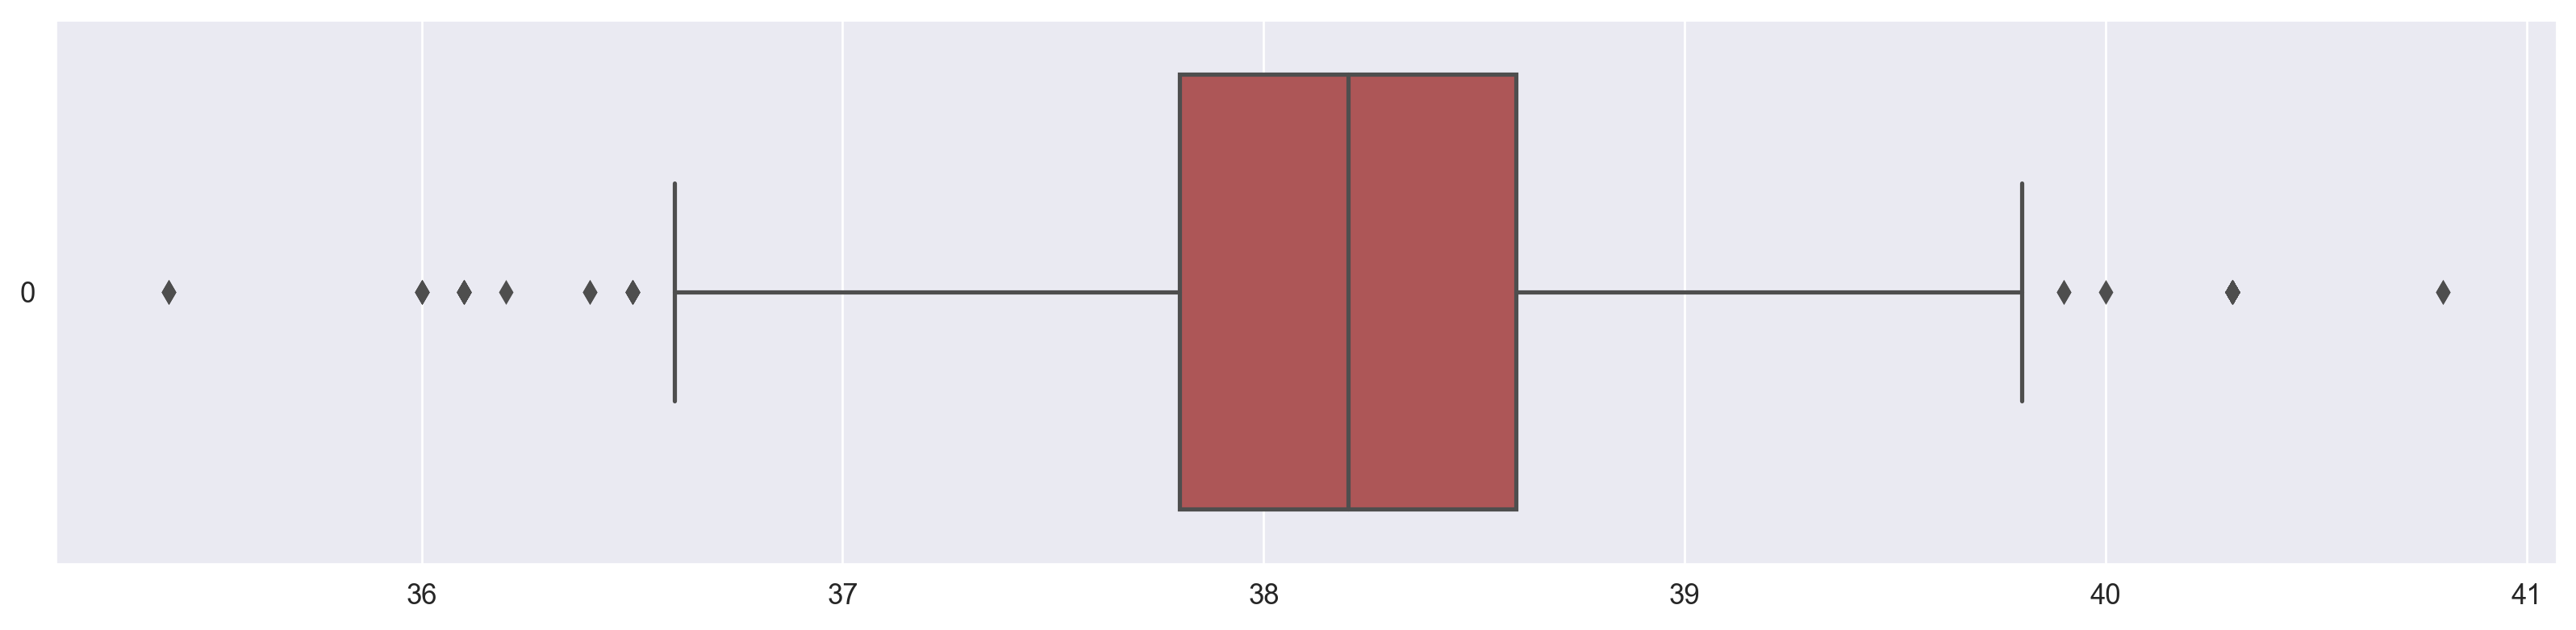

In [20]:
sns.boxplot(train['rectal_temp'], orient='h', color = '#bc4749')

In [21]:
replace_outlier_extream(train, 'rectal_temp')

<Axes: >

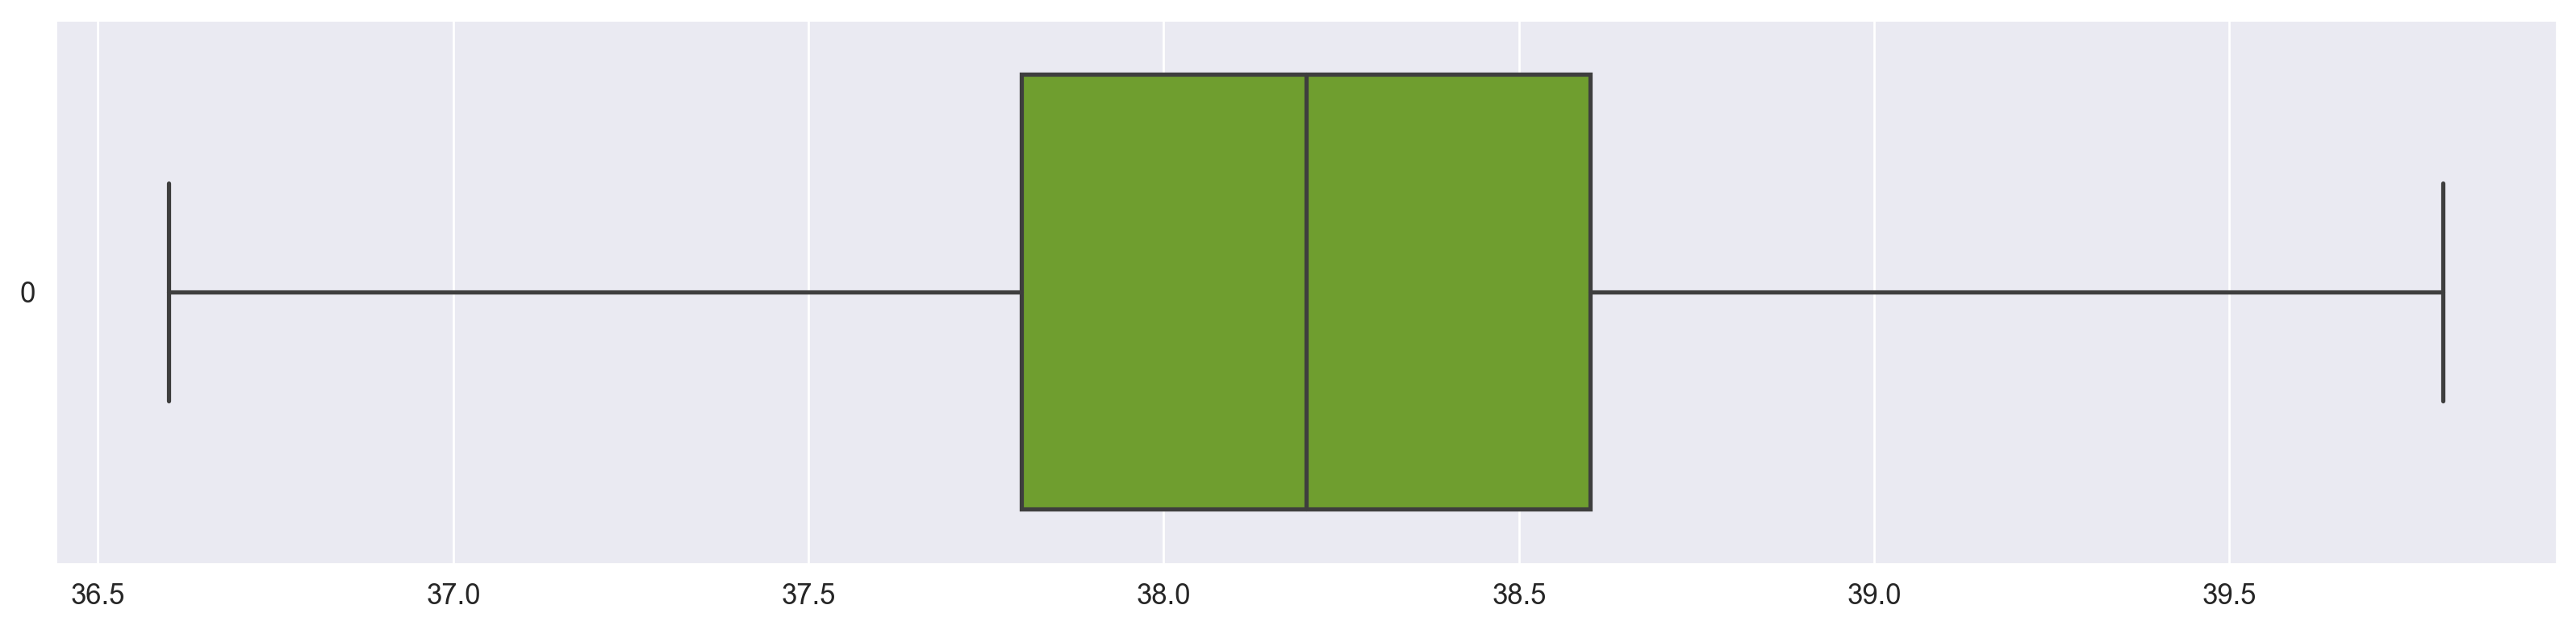

In [22]:
sns.boxplot(train['rectal_temp'], orient='h', color = '#72b01d')

#### Replacing Outlier In pulse Column

<Axes: >

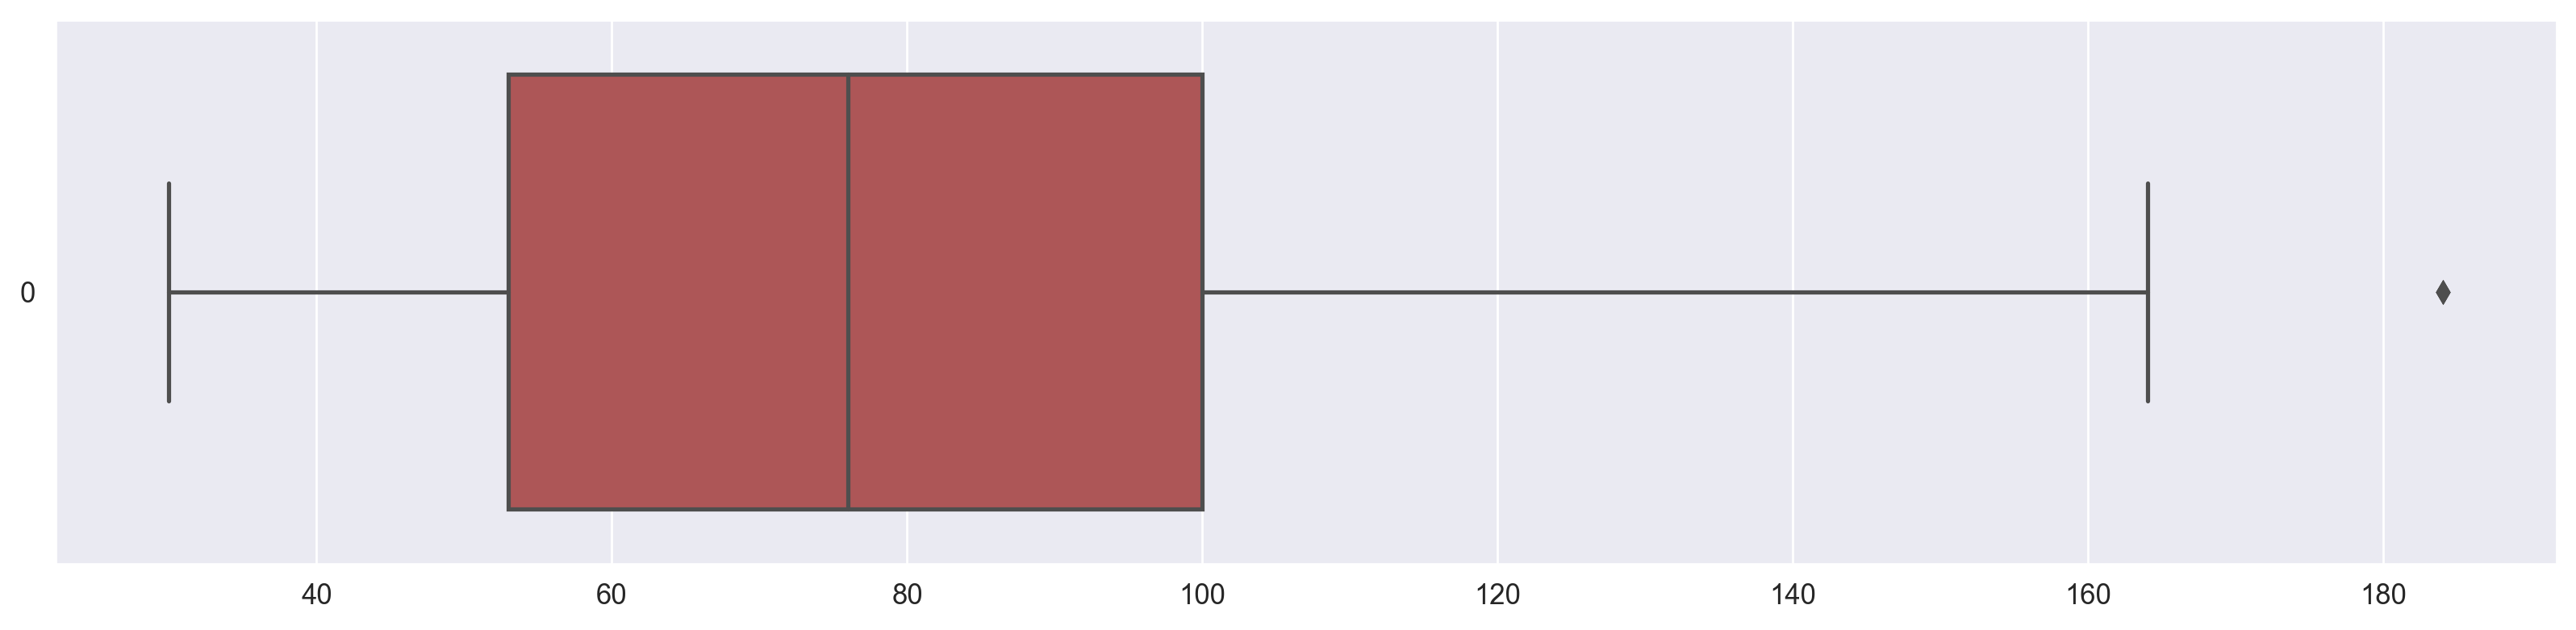

In [23]:
sns.boxplot(train['pulse'], orient='h', color = '#bc4749')

In [24]:
replace_outlier_extream(train, 'pulse')

<Axes: >

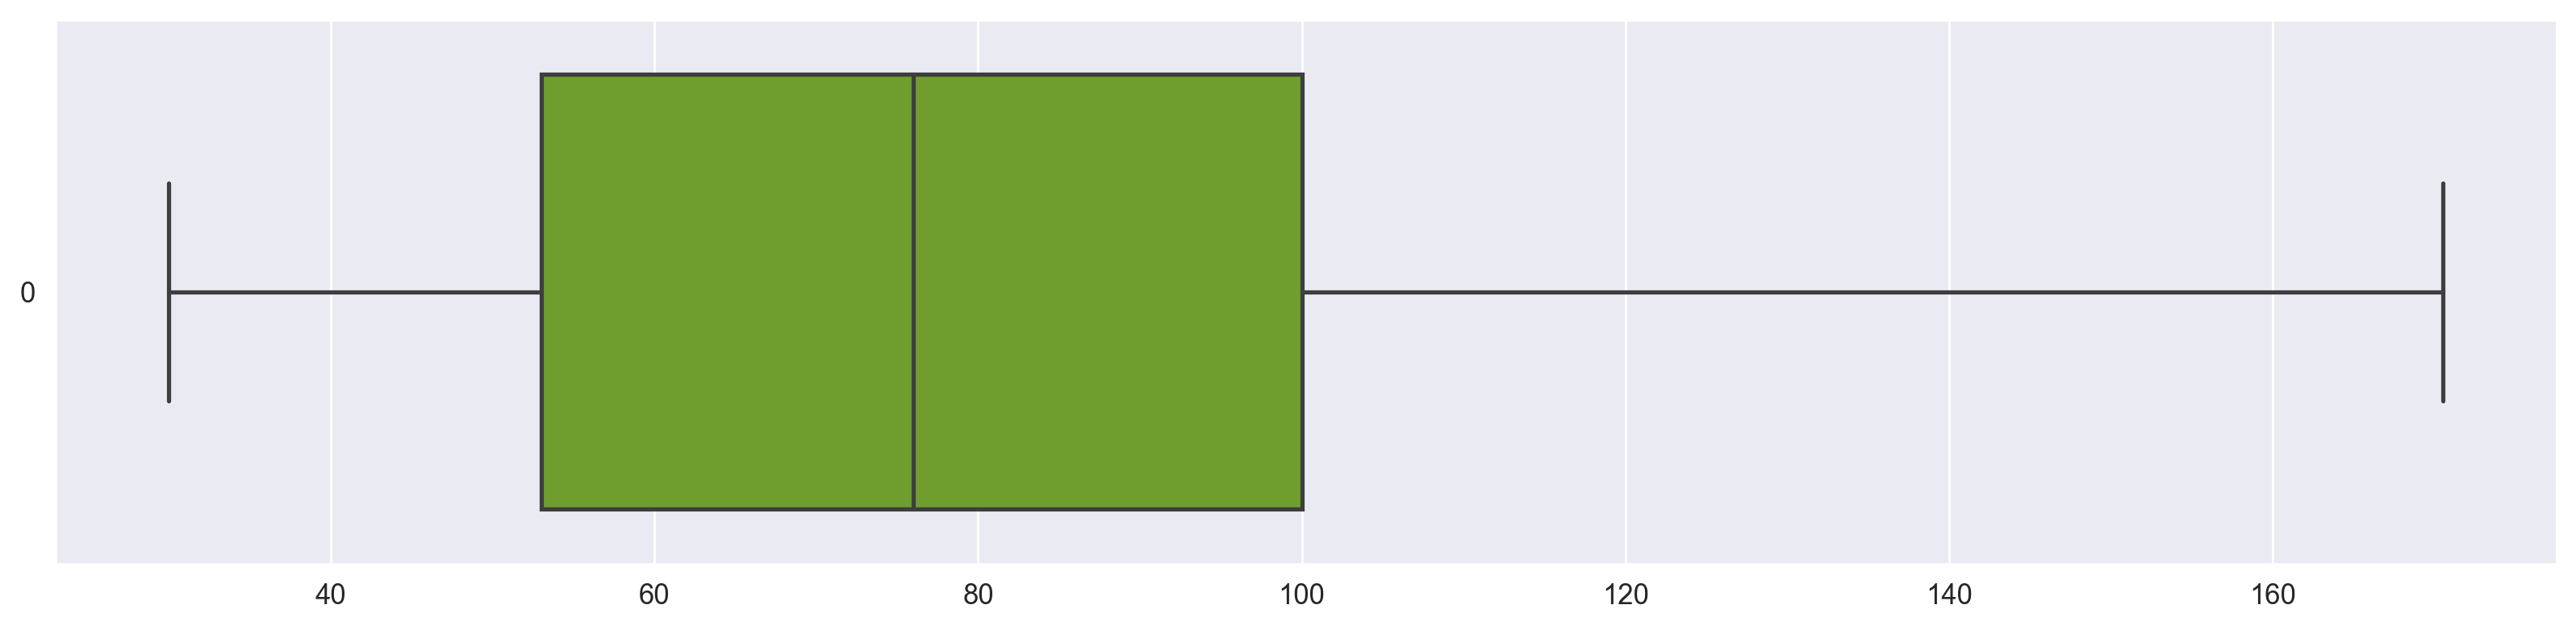

In [25]:
sns.boxplot(train['pulse'], orient='h', color = '#72b01d')

#### Replacing Outlier In respiratory_rate Column

<Axes: >

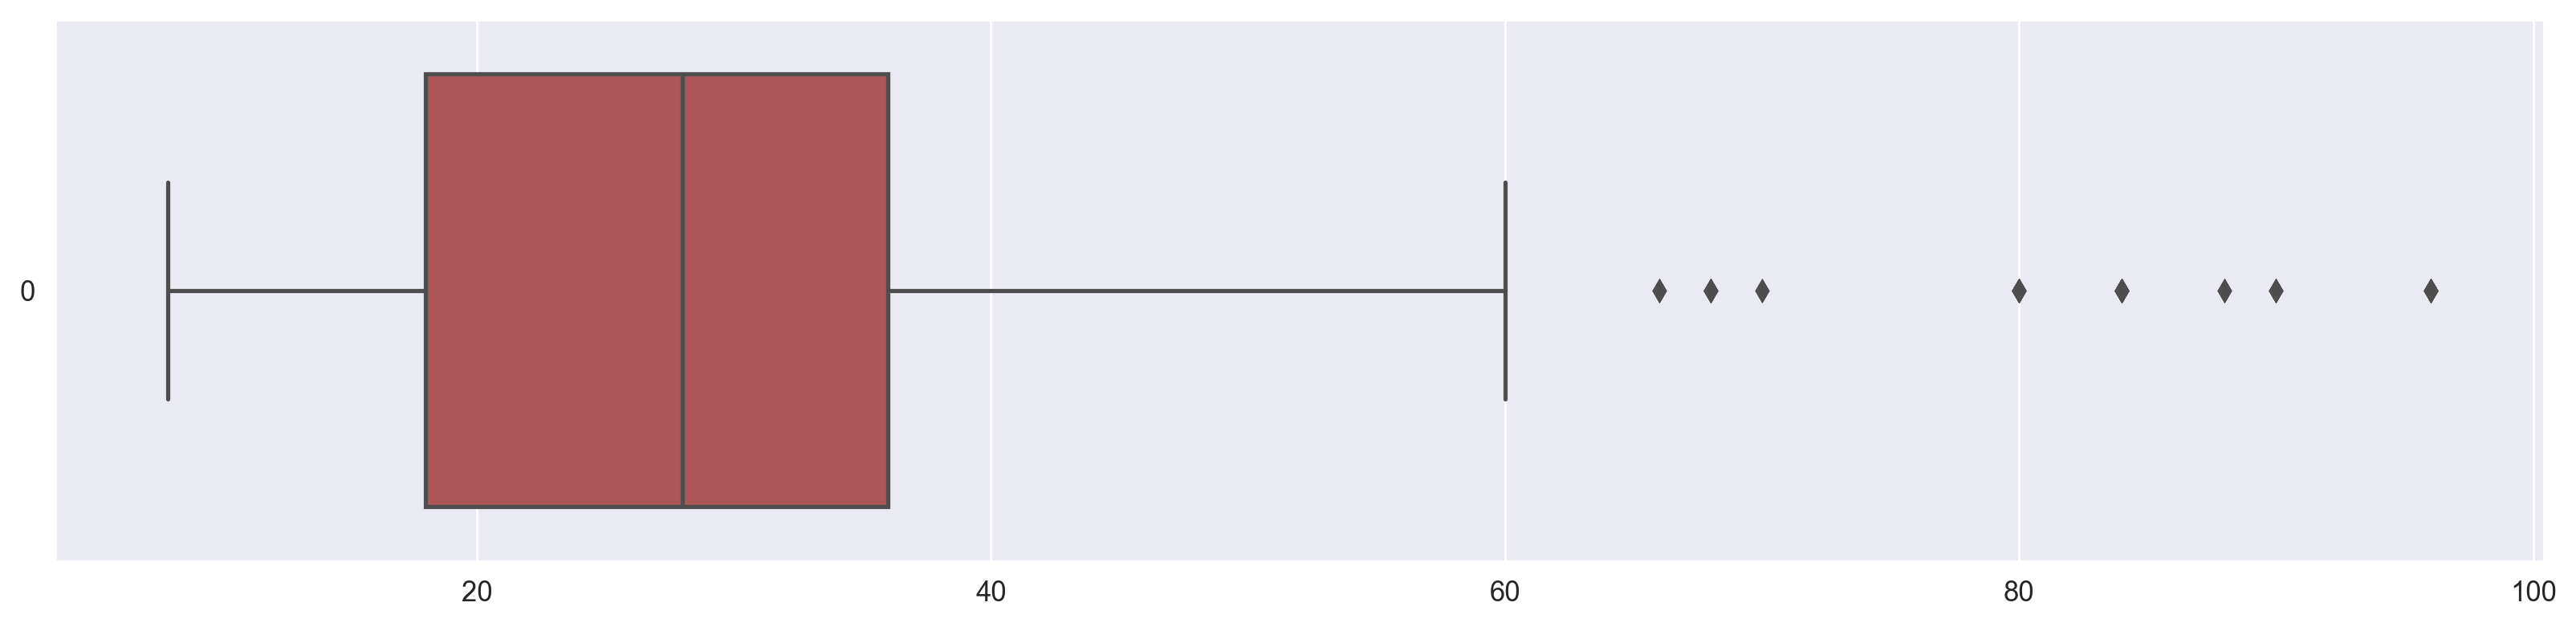

In [26]:
sns.boxplot(train['respiratory_rate'], orient='h', color = '#bc4749')

In [27]:
replace_outlier_extream(train, 'respiratory_rate')

<Axes: >

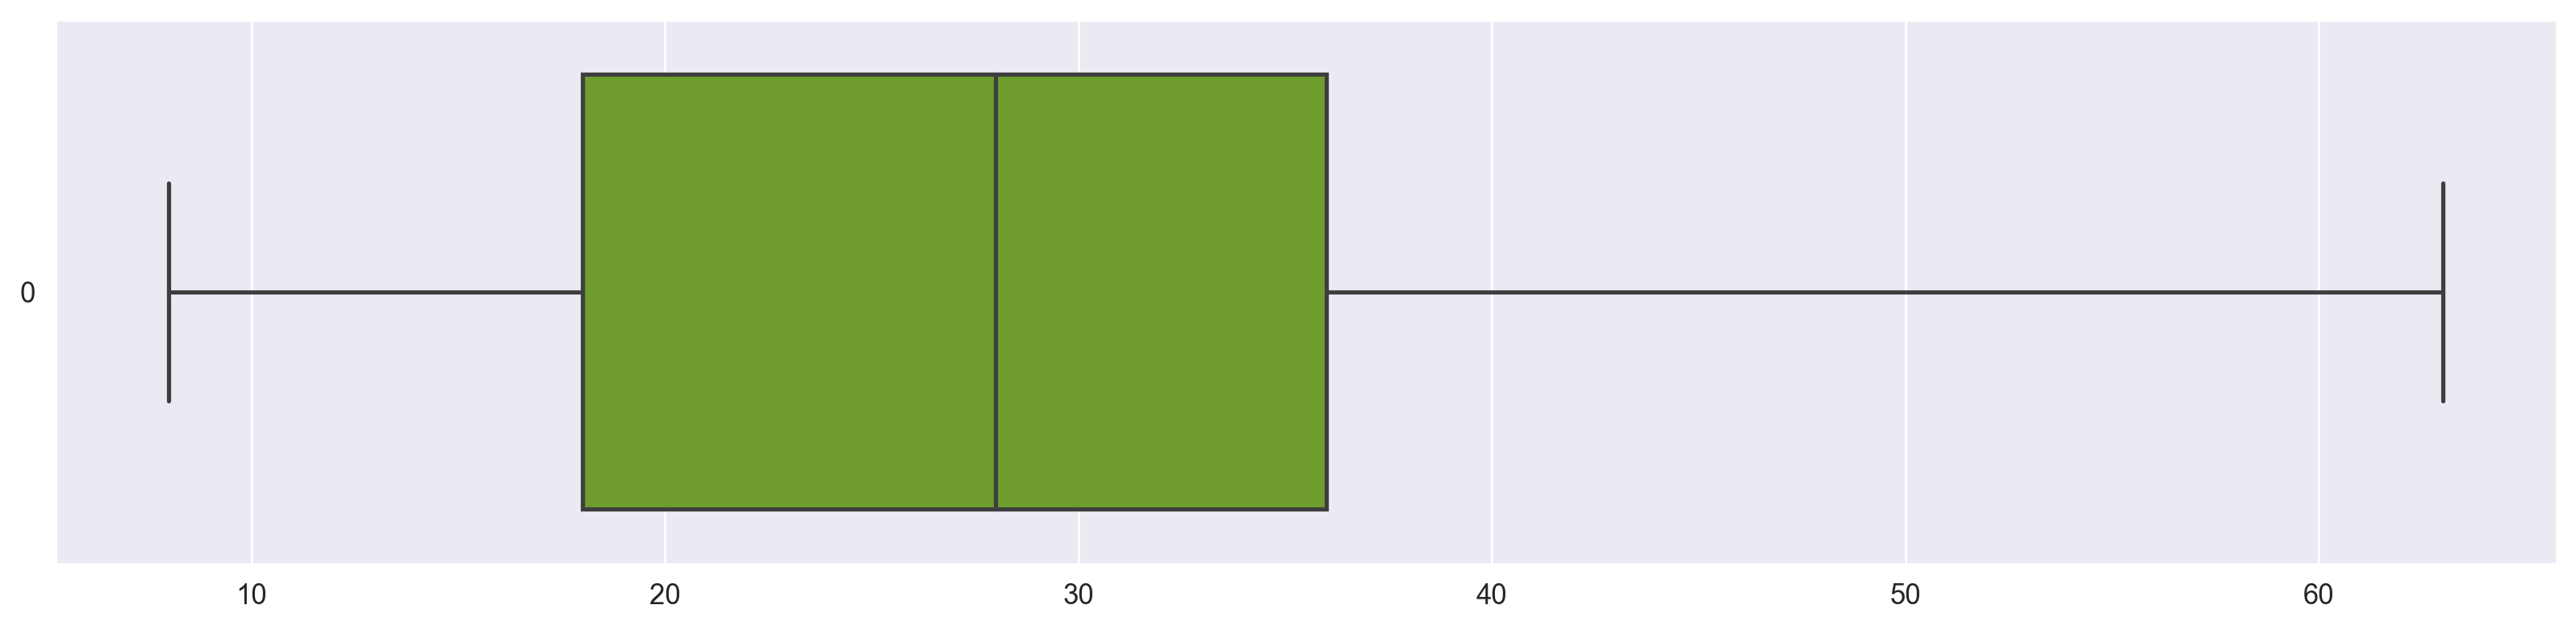

In [28]:
sns.boxplot(train['respiratory_rate'], orient='h', color = '#72b01d')

#### Replacing Outlier In total_protein Column

<Axes: >

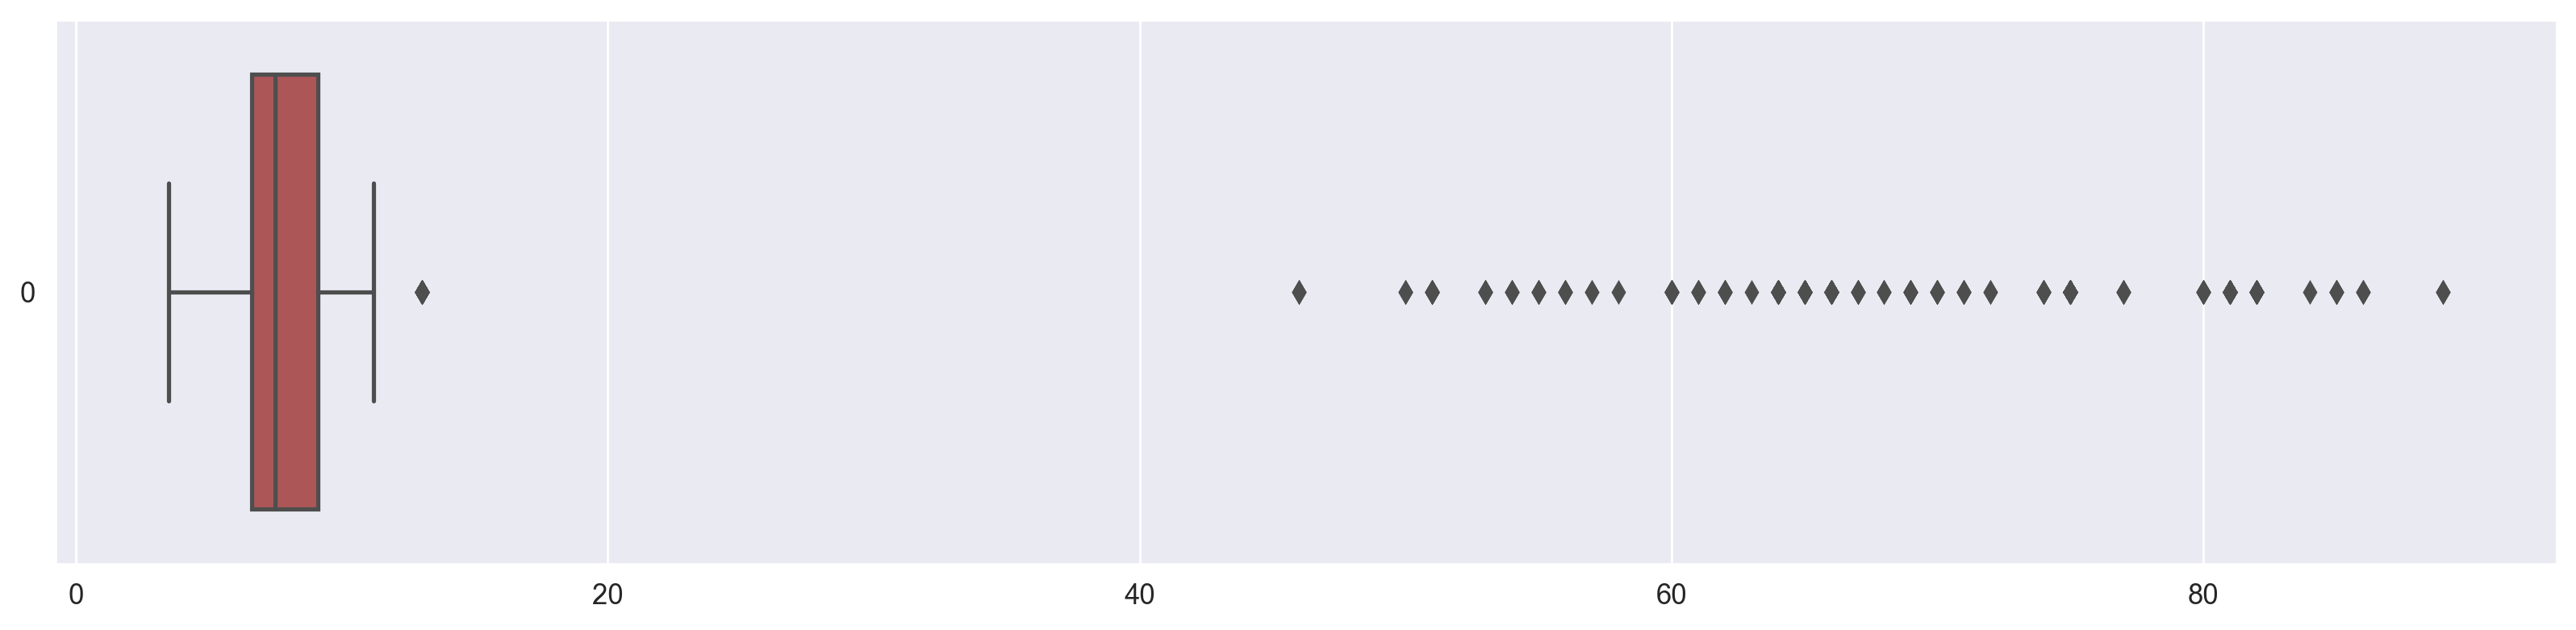

In [29]:
sns.boxplot(train['total_protein'], orient='h', color = '#bc4749')

In [30]:
replace_outlier_extream(train, 'total_protein')

<Axes: >

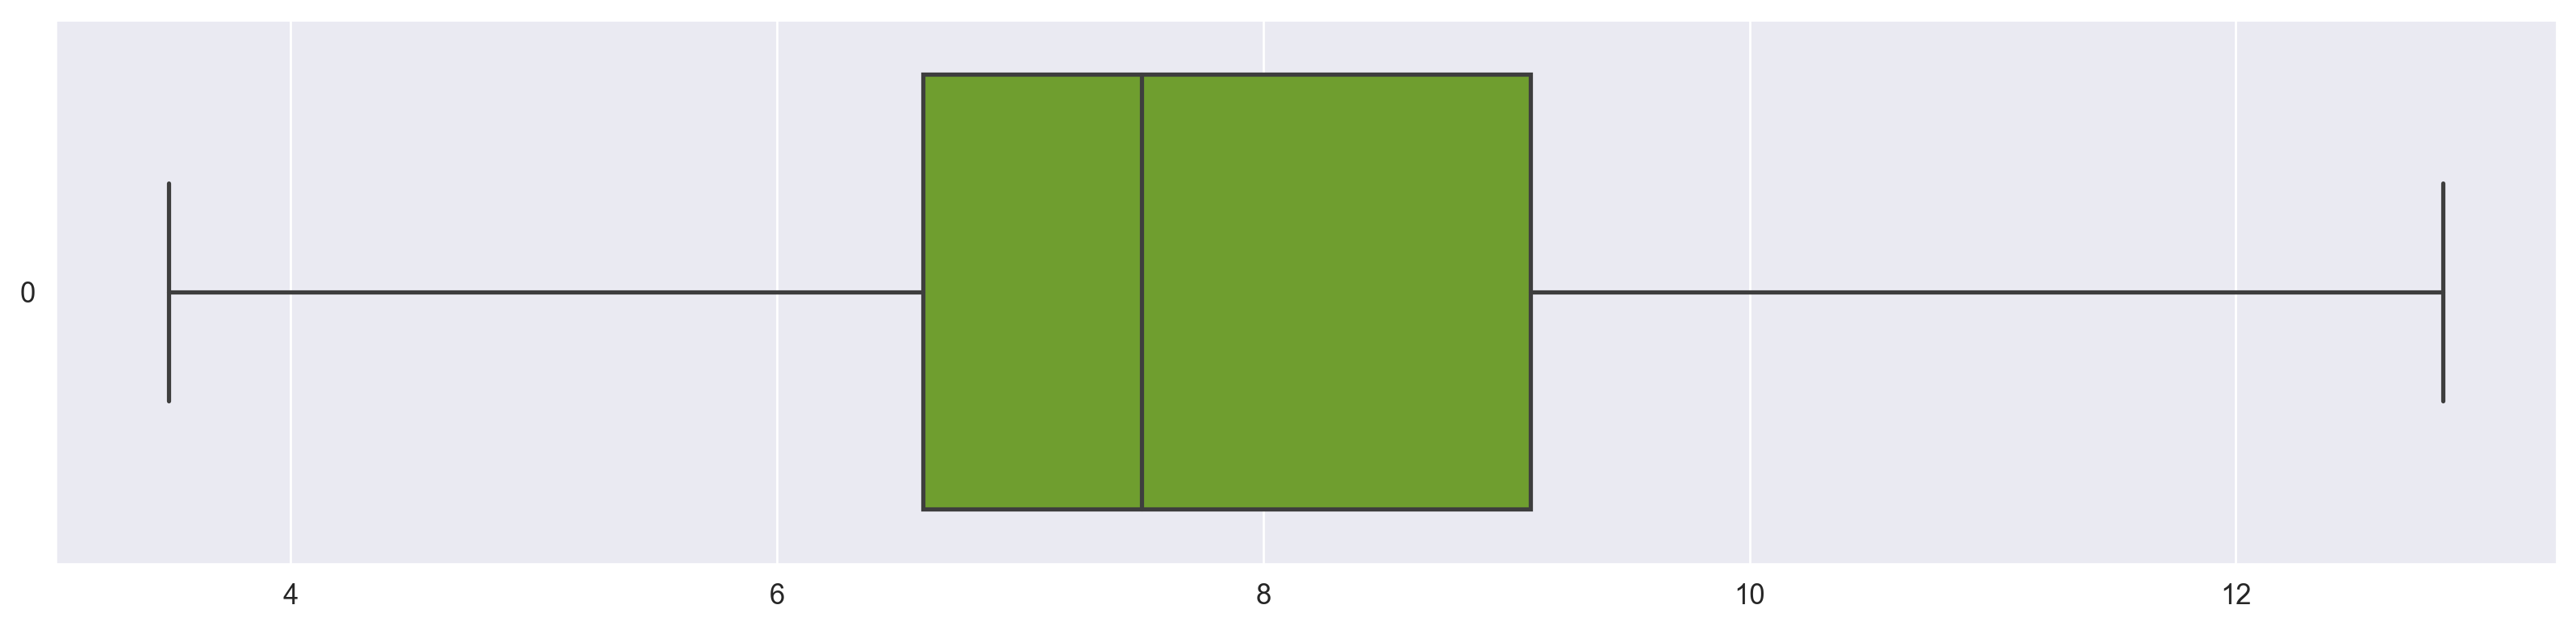

In [31]:
sns.boxplot(train['total_protein'], orient='h', color = '#72b01d')

#### Replacing Outlier In abdomo_protein Column

<Axes: >

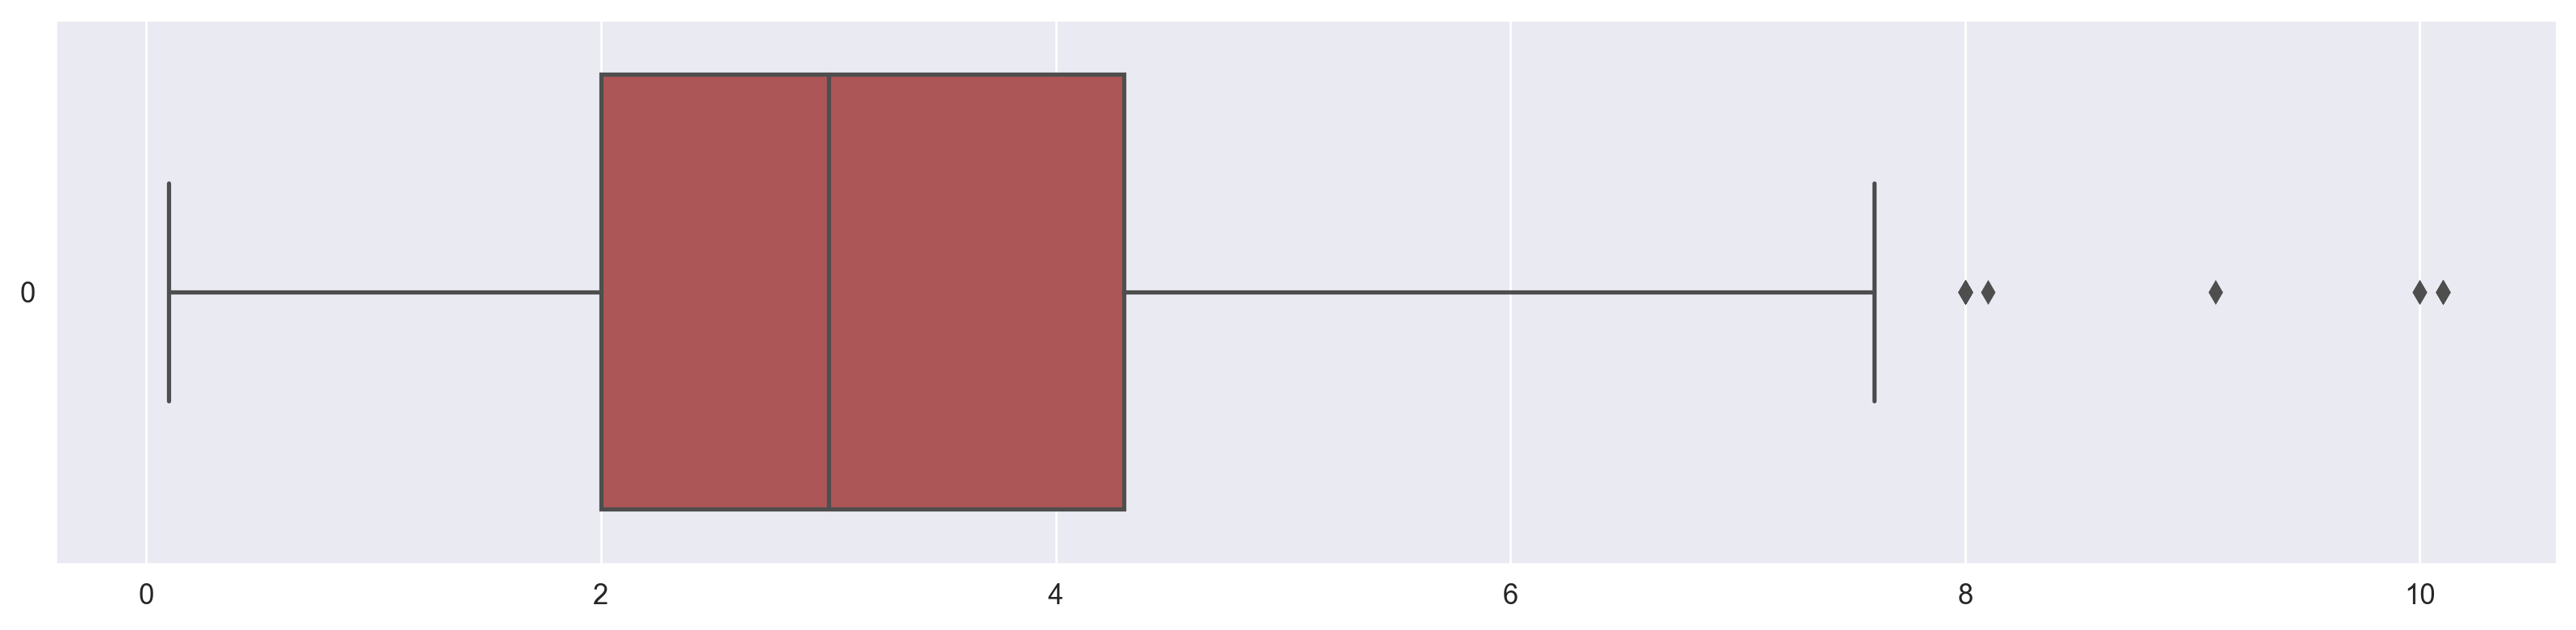

In [32]:
sns.boxplot(train['abdomo_protein'], orient='h', color = '#bc4749')

In [33]:
replace_outlier_extream(train, 'abdomo_protein')

<Axes: >

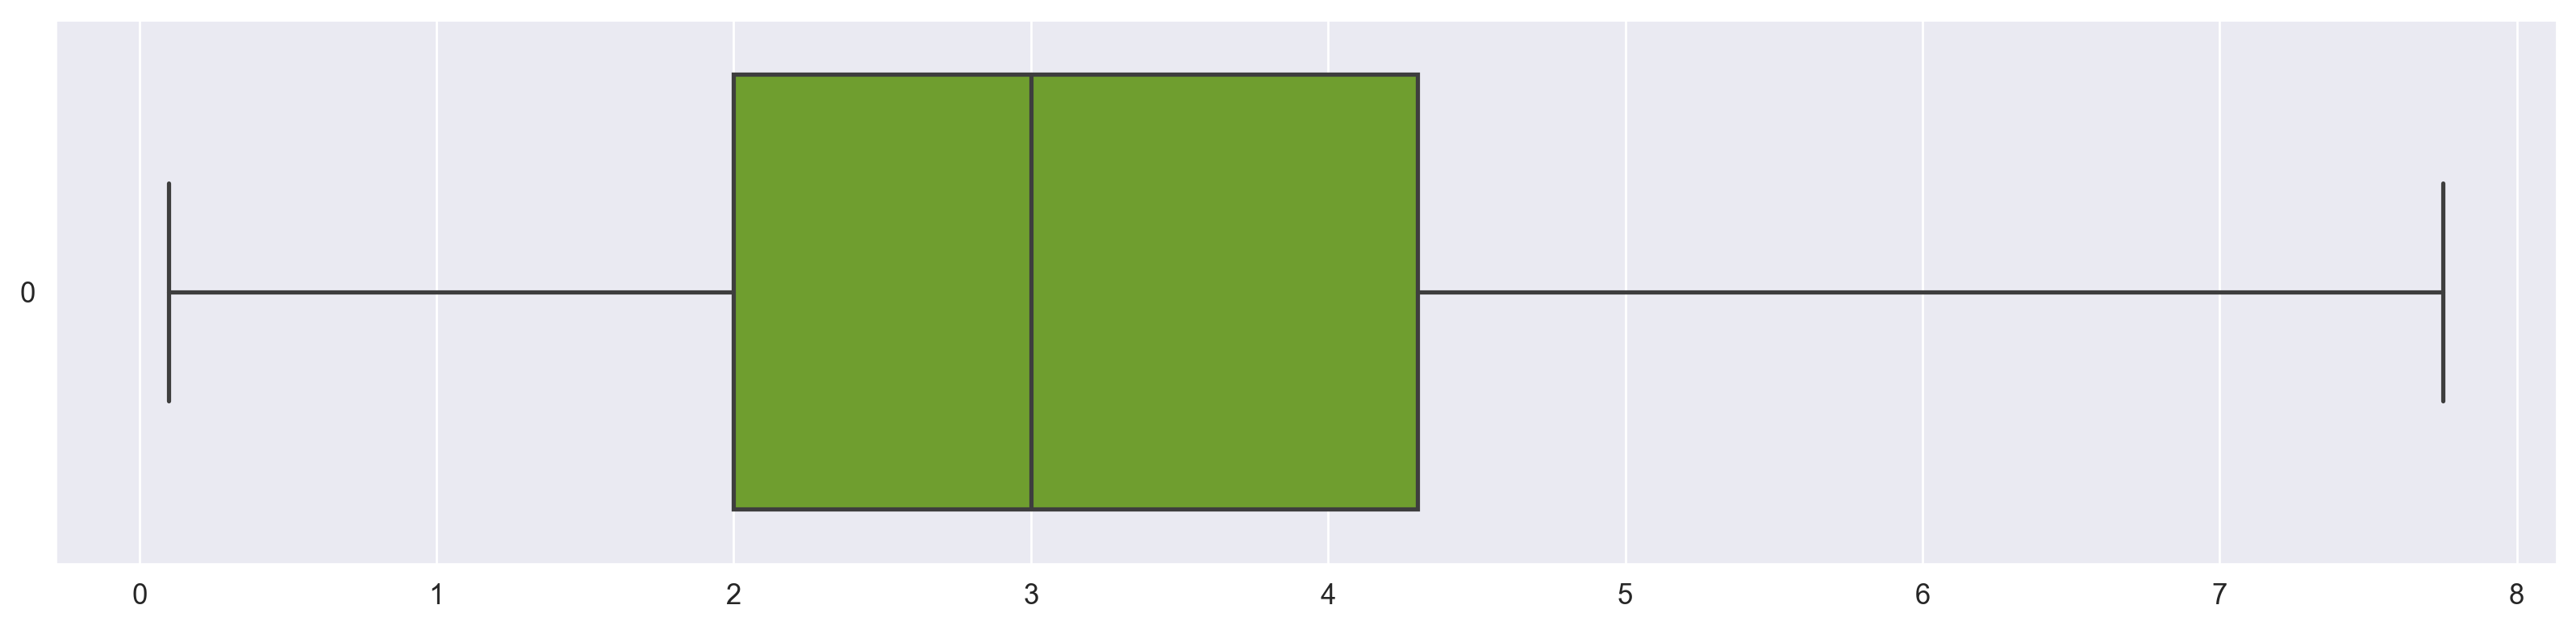

In [34]:
sns.boxplot(train['abdomo_protein'], orient='h', color = '#72b01d')

#### Outlier Percentage (After)

In [35]:
outlier_percentage(train.loc[:,['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein']])

rectal_temp : 0.0 %
pulse : 0.0 %
respiratory_rate : 0.0 %
nasogastric_reflux_ph : 0.0 %
packed_cell_volume : 0.0 %
total_protein : 0.0 %
abdomo_protein : 0.0 %


### Converting Categorical Data to Numerical Data

#### Converting Independent Column

In [36]:
x = train.drop(columns=['lesion_1','lesion_2', 'lesion_3', 'cp_data', 'outcome'])

x

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,...,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.50,serosanguious,3.4,yes
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,...,slight,more_1_liter,2.0,absent,distend_small,33.0,12.85,serosanguious,2.0,yes
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,...,slight,more_1_liter,3.5,absent,distend_large,37.0,6.40,serosanguious,3.4,yes
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,...,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.00,cloudy,3.9,yes
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,...,slight,less_1_liter,7.0,normal,normal,47.0,7.30,cloudy,2.6,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,depressed,...,slight,more_1_liter,2.0,absent,distend_large,57.0,12.85,serosanguious,2.0,yes
1231,yes,adult,37.5,60.0,50.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,...,slight,more_1_liter,3.0,decreased,distend_small,35.0,6.40,serosanguious,3.6,yes
1232,yes,young,37.5,84.0,40.0,normal,reduced,normal_pink,less_3_sec,mild_pain,...,slight,more_1_liter,3.0,increased,firm,40.0,5.90,cloudy,7.0,yes
1233,yes,adult,38.1,70.0,16.0,normal,reduced,bright_red,less_3_sec,mild_pain,...,slight,more_1_liter,2.0,absent,distend_small,58.0,12.85,cloudy,2.0,yes


In [37]:
x = pd.get_dummies(x)

x

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgery_no,surgery_yes,age_adult,...,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes
0,38.1,132.0,24.0,6.5,57.0,8.50,3.4,0,1,1,...,0,1,0,0,0,0,0,1,0,1
1,37.5,88.0,12.0,2.0,33.0,12.85,2.0,0,1,1,...,0,1,0,0,0,0,0,1,0,1
2,38.3,120.0,28.0,3.5,37.0,6.40,3.4,0,1,1,...,1,0,0,0,0,0,0,1,0,1
3,37.1,72.0,30.0,2.0,53.0,7.00,3.9,0,1,1,...,0,1,0,0,0,0,1,0,0,1
4,38.0,52.0,48.0,7.0,47.0,7.30,2.6,1,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,38.5,129.0,48.0,2.0,57.0,12.85,2.0,0,1,1,...,1,0,0,0,0,0,0,1,0,1
1231,37.5,60.0,50.0,3.0,35.0,6.40,3.6,0,1,1,...,0,1,0,0,0,0,0,1,0,1
1232,37.5,84.0,40.0,3.0,40.0,5.90,7.0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1233,38.1,70.0,16.0,2.0,58.0,12.85,2.0,0,1,1,...,0,1,0,0,0,0,1,0,0,1


In [38]:
x = pd.concat([x,   pd.get_dummies(train['lesion_1'], prefix = 'lesion_1', prefix_sep = '_'), 
                    pd.get_dummies(train['lesion_2'], prefix = 'lesion_2', prefix_sep = '_'),
                    pd.get_dummies(train['lesion_3'], prefix = 'lesion_3', prefix_sep = '_'),
                    pd.get_dummies(train['cp_data'], prefix = 'cp_data', prefix_sep = '_')], axis = 1)

x

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgery_no,surgery_yes,age_adult,...,lesion_1_31110,lesion_1_41110,lesion_2_0,lesion_2_1400,lesion_2_3111,lesion_2_3112,lesion_3_0,lesion_3_2209,cp_data_no,cp_data_yes
0,38.1,132.0,24.0,6.5,57.0,8.50,3.4,0,1,1,...,0,0,1,0,0,0,1,0,1,0
1,37.5,88.0,12.0,2.0,33.0,12.85,2.0,0,1,1,...,0,0,1,0,0,0,1,0,1,0
2,38.3,120.0,28.0,3.5,37.0,6.40,3.4,0,1,1,...,0,0,1,0,0,0,1,0,1,0
3,37.1,72.0,30.0,2.0,53.0,7.00,3.9,0,1,1,...,0,0,1,0,0,0,1,0,0,1
4,38.0,52.0,48.0,7.0,47.0,7.30,2.6,1,0,1,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,38.5,129.0,48.0,2.0,57.0,12.85,2.0,0,1,1,...,0,0,1,0,0,0,1,0,1,0
1231,37.5,60.0,50.0,3.0,35.0,6.40,3.6,0,1,1,...,0,0,1,0,0,0,1,0,0,1
1232,37.5,84.0,40.0,3.0,40.0,5.90,7.0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1233,38.1,70.0,16.0,2.0,58.0,12.85,2.0,0,1,1,...,0,0,1,0,0,0,1,0,1,0


#### Converting Target Column

In [39]:
le = LabelEncoder()

In [40]:
ytrain = pd.DataFrame({'outcome':le.fit_transform(train['outcome'])})

ytrain

,outcome
0,0
1,1
2,2
3,2
4,2
...,...
1230,2
1231,0
1232,2
1233,2


- 0 : died
- 1 : euthanized
- 2 : lived

## Creating DataFrame

In [42]:
eda = train.drop(columns=['outcome'])

eda

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,...,distend_small,57.0,8.50,serosanguious,3.4,yes,2209,0,0,no
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,...,distend_small,33.0,12.85,serosanguious,2.0,yes,2208,0,0,no
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,...,distend_large,37.0,6.40,serosanguious,3.4,yes,5124,0,0,no
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,...,distend_small,53.0,7.00,cloudy,3.9,yes,2208,0,0,yes
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,...,normal,47.0,7.30,cloudy,2.6,no,0,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,depressed,...,distend_large,57.0,12.85,serosanguious,2.0,yes,2206,0,0,no
1231,yes,adult,37.5,60.0,50.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,...,distend_small,35.0,6.40,serosanguious,3.6,yes,2209,0,0,yes
1232,yes,young,37.5,84.0,40.0,normal,reduced,normal_pink,less_3_sec,mild_pain,...,firm,40.0,5.90,cloudy,7.0,yes,400,0,0,yes
1233,yes,adult,38.1,70.0,16.0,normal,reduced,bright_red,less_3_sec,mild_pain,...,distend_small,58.0,12.85,cloudy,2.0,yes,2209,0,0,no


In [43]:
eda.to_csv('eda.csv', index=False)
#x.to_csv('x.csv', index=False)
#ytrain.to_csv('y.csv', index=False)